In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!ls

Code            NumOrient.bmp   SaveMeas.ipynb  ScalarBias.docx r.csv


In [7]:
!pwd

/Users/Joanna/Desktop/Polaris/phaseII/ZUPT/Final/ZUPTScalarMeas


# Demo

In [8]:
std = pd.read_csv('r.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

time = std[0].values

# Extract td3 tdacc tdgyro tdmag

## 1. td3 

In [9]:
time = std[0].values - std[0].values[0]

In [10]:
time

array([0.00000000e+00, 2.49023440e-02, 3.60717770e-02, ...,
       7.51545730e+01, 7.51570449e+01, 7.51570449e+01])

## 2. tdacc 

In [11]:
acc_t = std[std[1]==' ACC_UN'][0].values - std[std[1]==' ACC_UN'][0].values[0]

In [12]:
acc_t[0:10]

array([0.        , 0.00250244, 0.00500488, 0.00747681, 0.00994873,
       0.01242065, 0.01489258, 0.0173645 , 0.01983643, 0.02227783])

## 3. tdgyro

In [13]:
gyro_t = std[std[1]==' GYRO_UN'][0].values - std[std[1]==' GYRO_UN'][0].values[0]

In [14]:
gyro_t[0:10]

array([0.        , 0.00247192, 0.00491333, 0.00738525, 0.00985718,
       0.01229858, 0.01477051, 0.01724243, 0.01968384, 0.02215576])

## 3. tdmag

In [15]:
mag_t = std[std[1]==' MAG_UN'][0].values - std[std[1]==' MAG_UN'][0].values[0]

In [16]:
mag_t[:10]

array([0.        , 0.02490234, 0.04055786, 0.06051636, 0.08084106,
       0.10037231, 0.1201477 , 0.1401062 , 0.16009522, 0.18011475])

In [17]:
len(mag_t)

3760

In [18]:
import scipy.io as sio

In [19]:
sio.savemat('time.mat', {'time':time})

In [20]:
sio.savemat('magT.mat', {'magT':mag_t})
sio.savemat('accT.mat', {'accT':acc_t})
sio.savemat('gyroT.mat', {'gyroT':gyro_t})

In [21]:
len(time)

69296

# Extract acc

Text(0,0.5,u'acceleration (m/s^2)')

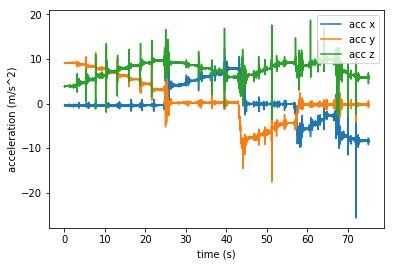

In [22]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)

plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

In [23]:
import math

In [24]:
roll = np.zeros(len(acc_x))
for i in range(len(roll)):
    roll[i] = -math.atan2(-acc_x[i], acc_y[i])


Text(0,0.5,u'roll (rad)')

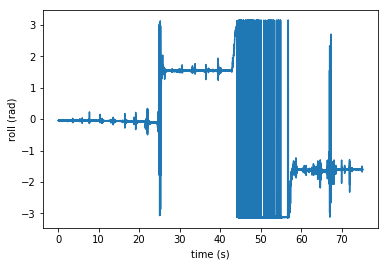

In [25]:
plt.plot(acc_t, roll)
plt.xlabel('time (s)')
plt.ylabel('roll (rad)')

In [26]:
yaw = np.zeros(len(acc_x))
for i in range(len(roll)):
    yaw[i] = -math.atan2(-acc_z[i], np.sign(acc_y[i])*np.sqrt(acc_x[i]**2 +acc_y[i]**2))


Text(0,0.5,u'roll (rad)')

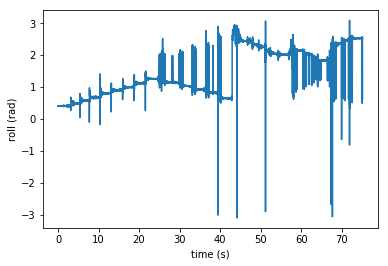

In [27]:
plt.plot(acc_t, yaw)
plt.xlabel('time (s)')
plt.ylabel('roll (rad)')

In [28]:
sio.savemat('accx.mat', {'accx':acc_x})
sio.savemat('accy.mat', {'accy':acc_y})
sio.savemat('accz.mat', {'accz':acc_z})

Text(0,0.5,u'acceleration (m/s^2)')

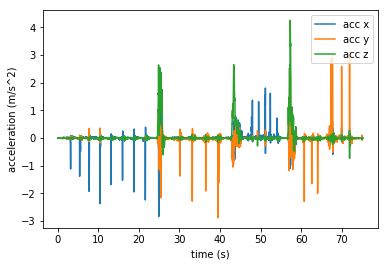

In [29]:
## Angular Velocity
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)

plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

In [30]:
np.mean(gyro_x)

0.0020295250284918034

In [31]:
np.mean(gyro_y)

-0.01584969341045902

In [32]:
np.mean(gyro_z)

0.05325788505763934

In [33]:
sio.savemat('gyrox.mat', {'gyrox':gyro_x})
sio.savemat('gyroy.mat', {'gyroy':gyro_y})
sio.savemat('gyroz.mat', {'gyroz':gyro_z})

Text(0,0.5,u'orientation (rad)')

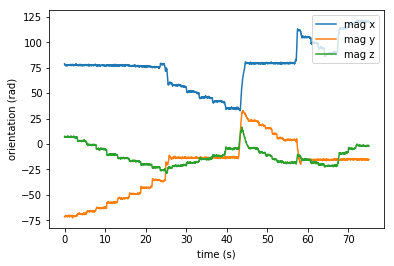

In [34]:
## Magnetometer
std_mag = std[std[1]==' MAG_UN']

mag_x = std_mag[2].values
mag_y = std_mag[3].values
mag_z = std_mag[4].values

mag_t = std_mag[0].values

plt.plot(mag_t, mag_x)
plt.plot(mag_t, mag_y)
plt.plot(mag_t, mag_z)

plt.legend(['mag x','mag y','mag z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('orientation (rad)')

In [35]:
sio.savemat('magx.mat', {'magx':mag_x})
sio.savemat('magy.mat', {'magy':mag_y})
sio.savemat('magz.mat', {'magz':mag_z})